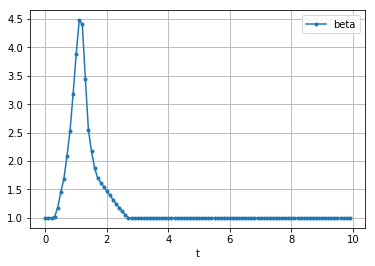

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import ode

for j in range (1,5):
    ab3=[]
    cd3=[]

def fun(t, z, omega):
    #Right hand side of the differential equations
    #  dx/dt = y
    #  dy/dt = omega * x
    d, a, b, g, w = omega
    x, y = z                                    
    f = [y,- a*x - b*x**3 - d*y  + g*math.cos(w*t)]  

    return f


# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri5' or "dopri5".
solver = ode(fun)
solver.set_integrator('dop853')



# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.

for i in range(0,100):
    
    d = 0.1
    g = 1.0
    a = 1.0     
    
    
    w = i*0.025*j
    b = 0.04

    val = d, a, b, g, w                      
    solver.set_f_params(val)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].
    t1 = 15
    N = 100
    t = np.linspace(t0, t1, N)
    sol = np.empty((N, 2))
    sol[0] = z0

    k = 1

    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1

    x = sol[:,0]

    ab3.append(w)
    cd3.append(max(abs(x)))
    


# Plot the solution...
#plt.plot(ab, cd, label='beta')
#plt.plot(t, sol[:,1], label='y')
#plt.xlabel('t')
#plt.grid(True)
#plt.legend()
#plt.show()
plt.plot(ab3, cd3, label='beta', marker = '.')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()

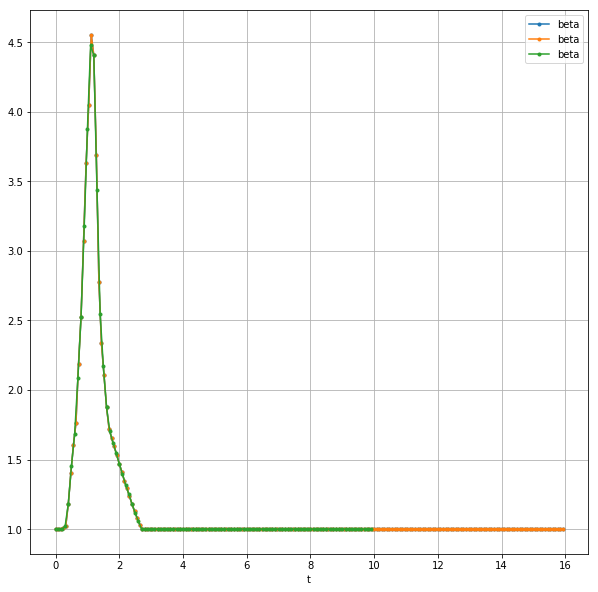

In [71]:
plt.figure(figsize=(10, 10))
plt.plot(ab2, cd2, label='beta', marker ='.')
plt.plot(ab, cd, label='beta', marker = '.')
plt.plot(ab3, cd3, label='beta', marker = '.')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()